### Convolution
implement by "kernel" convolution <br>
https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381


In [1]:
def conv2D(img, kernel, padding=0, stride=1):
    '''
    kernel size always be odd.
    smooth kernel be like:
        [1,1,1]
    1/9*[1,1,1]
        [1,1,1]   
    
    output size be like:
    img_out = (img_in+2p-k)/s+1
    p: padding size
    k: kernel size
    s: stride size
    '''
    # Cross correlation
    kernel = np.flipud(np.fliplr(kernel))

    # get ouput image size and convolution output
    hIn, wIn = img.shape
    hK, wK = kernel.shape
    hOut = int((hIn + 2*padding - hK) / stride) + 1
    wOut = int((wIn + 2*padding - wK) / stride) + 1
    output = np.zeros((hOut, wOut))

    # get padded image
    if padding != 0:
        imgPadded = np.zeros((hIn+2*padding, wIn+2*padding))
        imgPadded[padding:-1*padding, padding:-1*padding] = img
    else:
        imgPadded = img
    plt.imshow(imgPadded)

    # Convolution 
    '''
    iterate through image 
    by applying element wise multiplication and sum it 
    then set it to the respective element in the output array
    '''
    for y in range(hIn):
        # Exit convolution
        if y > hIn - hK: break
        # Only convolve if y%stride=0
        if y % stride == 0:
            for x in range(wIn):
                # Exit convolution
                if x > wIn -wK: break
                if x % stride == 0:
                    output[y, x] = (kernel * imgPadded[y:y+hK, x:x+wK]).sum()

    return output

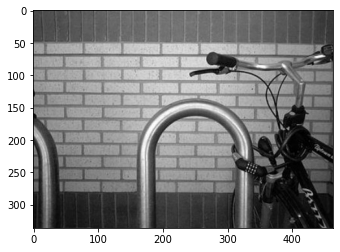

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("data\image2.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

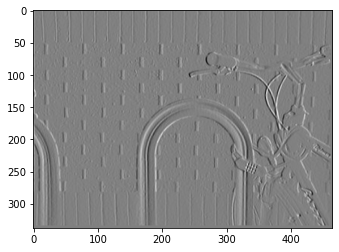

In [3]:
# smooth filter
kSize = 5  # modify kernel size to see effect
kSize = 10  # modify kernel size to see effect
kSize = 20  # modify kernel size to see effect
kernel_smooth = np.ones((kSize,kSize))/kSize**2    

# sobel edge detector 
kernel_sobel = np.array([ 
    [1,0,-1], 
    [2,0,-2], 
    [1,0,-1]])

# output = conv2D(img, kernel_smooth,2)
output = conv2D(img, kernel_sobel,2)

# show output
plt.imshow(output, cmap='gray')